# Spotify song cluster analysis

In [48]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import statsmodels.formula.api as smf

from warnings import filterwarnings
filterwarnings('ignore')


import os
for dirname, _, filenames in os.walk(r'C:\Users\79308\Desktop\patel\Cluster\7 Spotify\archive (7)'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


C:\Users\79308\Desktop\patel\Cluster\7 Spotify\archive (7)\top50.csv


In [49]:
#Importing Dataset
data=pd.read_csv(r'C:\Users\79308\Desktop\patel\Cluster\7 Spotify\archive (7)/top50.csv', encoding='ISO-8859-1')
data.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [50]:
print(data.shape)

(50, 14)


In [51]:
data=data.dropna(how='all')

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        50 non-null     int64 
 1   Track.Name        50 non-null     object
 2   Artist.Name       50 non-null     object
 3   Genre             50 non-null     object
 4   Beats.Per.Minute  50 non-null     int64 
 5   Energy            50 non-null     int64 
 6   Danceability      50 non-null     int64 
 7   Loudness..dB..    50 non-null     int64 
 8   Liveness          50 non-null     int64 
 9   Valence.          50 non-null     int64 
 10  Length.           50 non-null     int64 
 11  Acousticness..    50 non-null     int64 
 12  Speechiness.      50 non-null     int64 
 13  Popularity        50 non-null     int64 
dtypes: int64(11), object(3)
memory usage: 5.6+ KB


In [53]:
print(data.groupby('Genre').size())

Genre
atl hip hop         1
australian pop      1
big room            1
boy band            1
brostep             2
canadian hip hop    3
canadian pop        2
country rap         2
dance pop           8
dfw rap             2
edm                 3
electropop          2
escape room         1
latin               5
panamanian pop      2
pop                 7
pop house           1
r&b en espanol      1
reggaeton           2
reggaeton flow      2
trap music          1
dtype: int64


In [54]:
data.isnull().sum().sum()

0

In [55]:
data=data.sort_values(['Unnamed: 0'])
data=data.reindex(data['Unnamed: 0'])
data=data.drop("Unnamed: 0",axis=1)
data.head()

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
Unnamed: 0,,,,,,,,,,,,,
1,China,Anuel AA,reggaeton flow,105.0,81.0,79.0,-4.0,8.0,61.0,302.0,8.0,9.0,92.0
2,boyfriend (with Social House),Ariana Grande,dance pop,190.0,80.0,40.0,-4.0,16.0,70.0,186.0,12.0,46.0,85.0
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93.0,65.0,64.0,-8.0,8.0,55.0,198.0,12.0,19.0,86.0
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150.0,65.0,58.0,-4.0,11.0,18.0,175.0,45.0,7.0,94.0
5,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102.0,68.0,80.0,-5.0,9.0,84.0,220.0,9.0,4.0,84.0


In [56]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Beats.Per.Minute,49.0,120.122449,31.215403,85.0,96.0,104.0,138.0,190.0
Energy,49.0,64.244898,14.318593,32.0,56.0,68.0,75.0,88.0
Danceability,49.0,71.285714,12.034672,29.0,67.0,73.0,80.0,90.0
Loudness..dB..,49.0,-5.653061,2.077168,-11.0,-7.0,-6.0,-4.0,-2.0
Liveness,49.0,14.795918,11.191477,5.0,8.0,11.0,16.0,58.0
Valence.,49.0,54.183673,22.370622,10.0,38.0,55.0,68.0,95.0
Length.,49.0,201.163265,39.522856,115.0,176.0,198.0,218.0,309.0
Acousticness..,49.0,22.530612,19.008882,1.0,9.0,15.0,34.0,75.0
Speechiness.,49.0,12.673469,11.192236,3.0,5.0,7.0,15.0,46.0
Popularity,49.0,87.673469,4.365527,70.0,86.0,88.0,91.0,95.0


In [57]:
data=data.loc[:49,:]

In [58]:
#Rename Column
data=data.rename(columns={"Loudness..dB..": "Loudness", 
                          "Acousticness..": "Acousticness",
                          "Speechiness.":"Speechiness",
                          "Valence.":"Valence",
                          "Length.":"Length"})

In [59]:
final=data.copy()

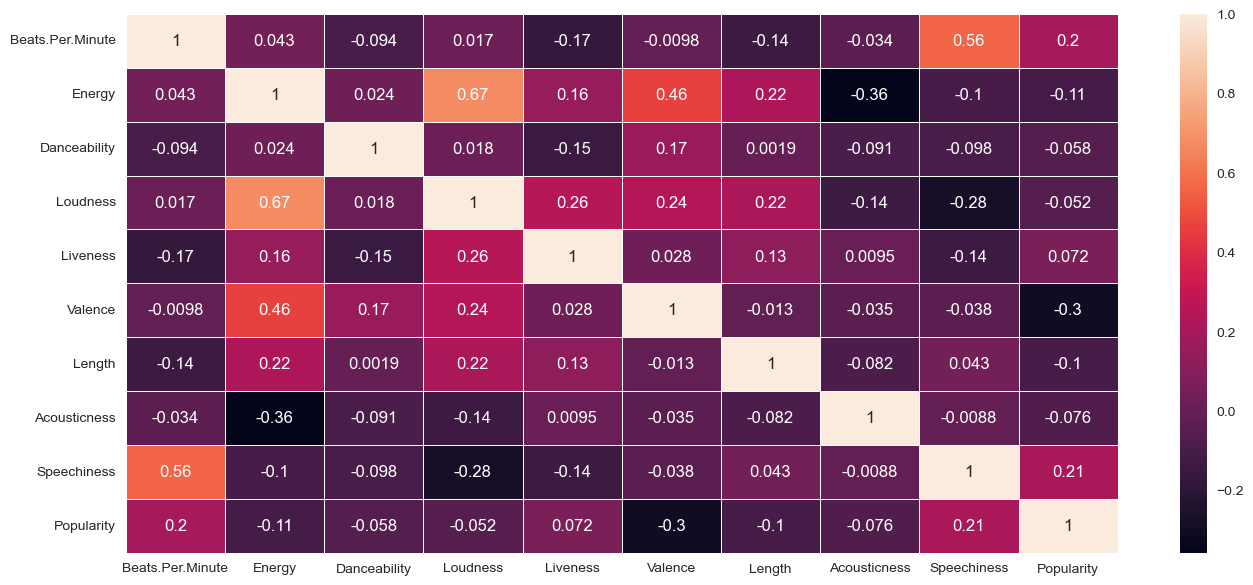

In [60]:
#Correlation Matrix Between Numeric Features
plt.figure(figsize = (16,7))

corrMatrix = final.corr()
sns.heatmap(corrMatrix, annot=True, linewidths=.5);

In [61]:
#Grouping Some Features According To Genre
a=final[['Genre', 'Popularity','Energy', 'Length','Liveness','Acousticness']].groupby(
    ['Genre'], as_index=False).mean().sort_values(by='Energy', ascending=True)
a

,Genre,Popularity,Energy,Length,Liveness,Acousticness
11,electropop,92.000000,44.000000,194.500000,11.000000,29.000000
5,canadian hip hop,89.666667,45.000000,193.000000,15.000000,21.666667
9,dfw rap,92.500000,56.500000,166.500000,9.000000,50.500000
0,atl hip hop,89.000000,59.000000,200.000000,13.000000,2.000000
1,australian pop,83.000000,59.000000,210.000000,18.000000,69.000000
8,dance pop,85.750000,59.875000,202.625000,15.500000,27.000000
7,country rap,89.000000,60.500000,136.000000,11.500000,19.500000
12,escape room,91.000000,62.000000,173.000000,12.000000,11.000000
10,edm,86.666667,63.000000,218.666667,20.333333,12.333333
15,pop,85.857143,63.285714,195.428571,12.142857,21.428571


In [62]:
sorted_energy=final.sort_values(by=['Energy'])

In [63]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=sorted_energy['Energy'],
    y=sorted_energy['Loudness'],
    name="Energy and Loudness"       # this sets its legend entry
))


fig.add_trace(go.Scatter(
    x=sorted_energy['Energy'],
    y=sorted_energy['Acousticness'],
    name="Energy and Acousticness"
))

fig.update_layout(
    title="Acousticness-Loudness values according to Energy",
    xaxis_title="Energy",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="#7f7f7f"
    )
)

fig.show()

As you can see above, while there is an negative relationship between Energy and Acousticness, there is a positive relationship between Energy and Loudness.

In [64]:
import plotly.express as px

fig = px.bar(a, x='Genre', y='Popularity',
             hover_data=['Energy', 'Length'],
             color='Energy',height=400)

fig.update_layout(
    title="Popularity and energy comparison by Genre",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="#7f7f7f"
    )
)

fig.show()

In [65]:
fig = px.bar(a, y='Acousticness', x='Genre').update_xaxes(categoryorder='total ascending')

fig.update_layout(
    title="Acousticness comparison by Genre",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="#7f7f7f"
    )
)
fig.show()

In [66]:
#Add to new column according to Genre

final['GeneralGenre']=['hip hop' if each =='atl hip hop'
                      else 'hip hop' if each =='canadian hip hop'
                      else 'hip hop' if each == 'trap music'
                      else 'pop' if each == 'australian pop'
                      else 'pop' if each == 'boy band'
                      else 'pop' if each == 'canadian pop'
                      else 'pop' if each == 'dance pop'
                      else 'pop' if each == 'panamanian pop'
                      else 'pop' if each == 'pop'
                      else 'pop' if each == 'pop house'
                      else 'electronic' if each == 'big room'
                      else 'electronic' if each == 'brostep'
                      else 'electronic' if each == 'edm'
                      else 'electronic' if each == 'electropop'
                      else 'rap' if each == 'country rap'
                      else 'rap' if each == 'dfw rap'
                      else 'hip hop' if each == 'hip hop'
                      else 'latin' if each == 'latin'
                      else 'r&b' if each == 'r&n en espanol'
                      else 'raggae' for each in final['Genre']]

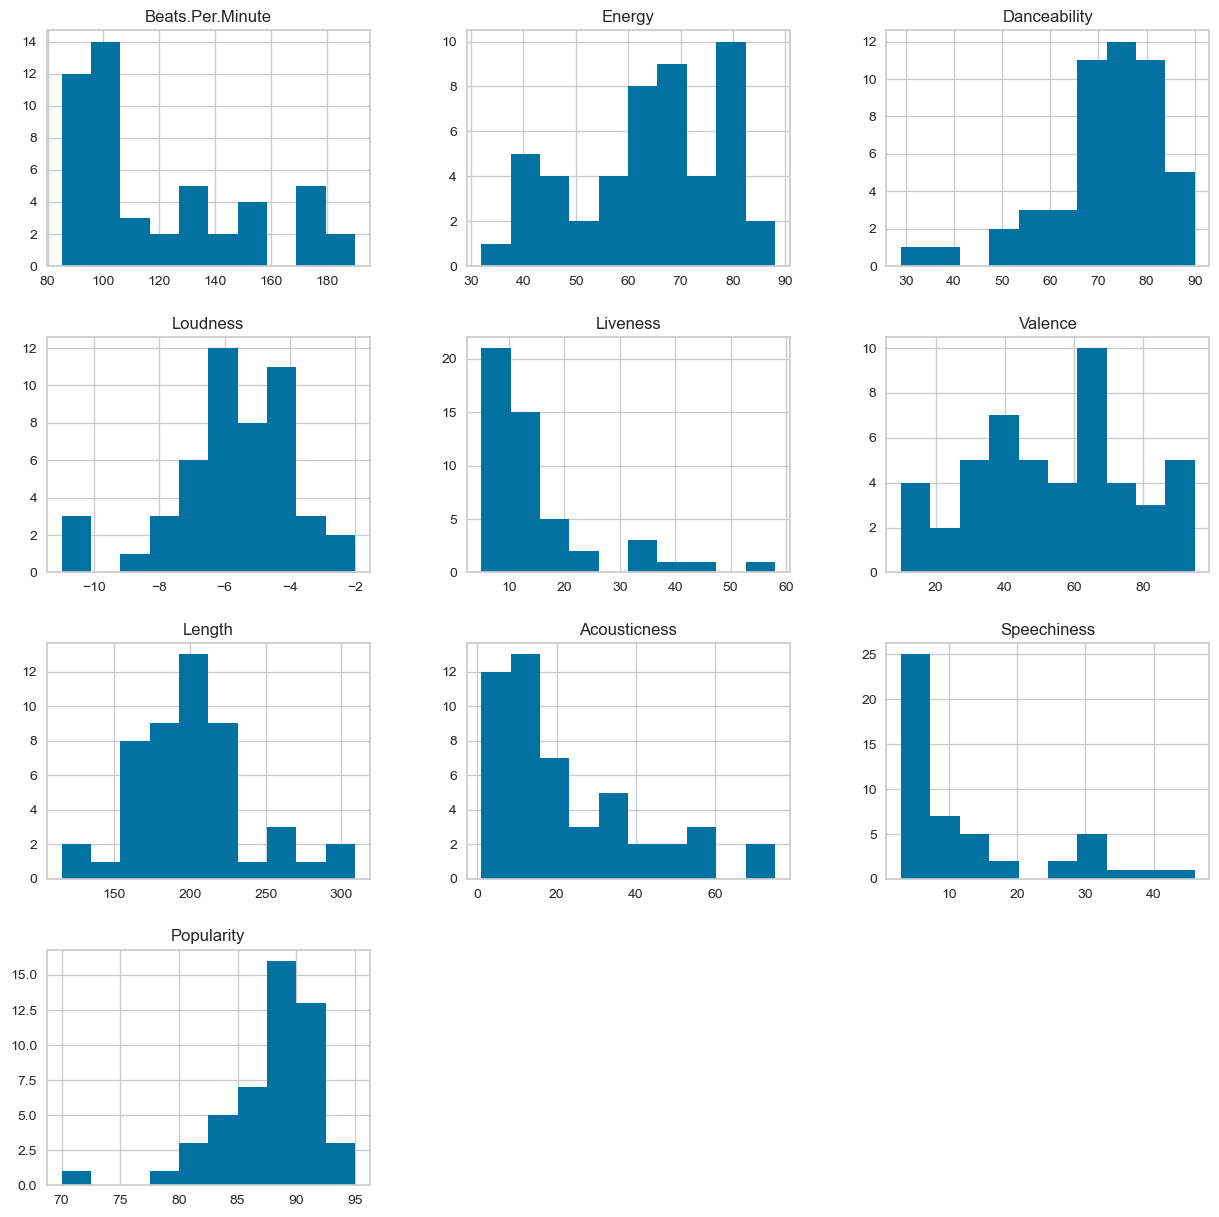

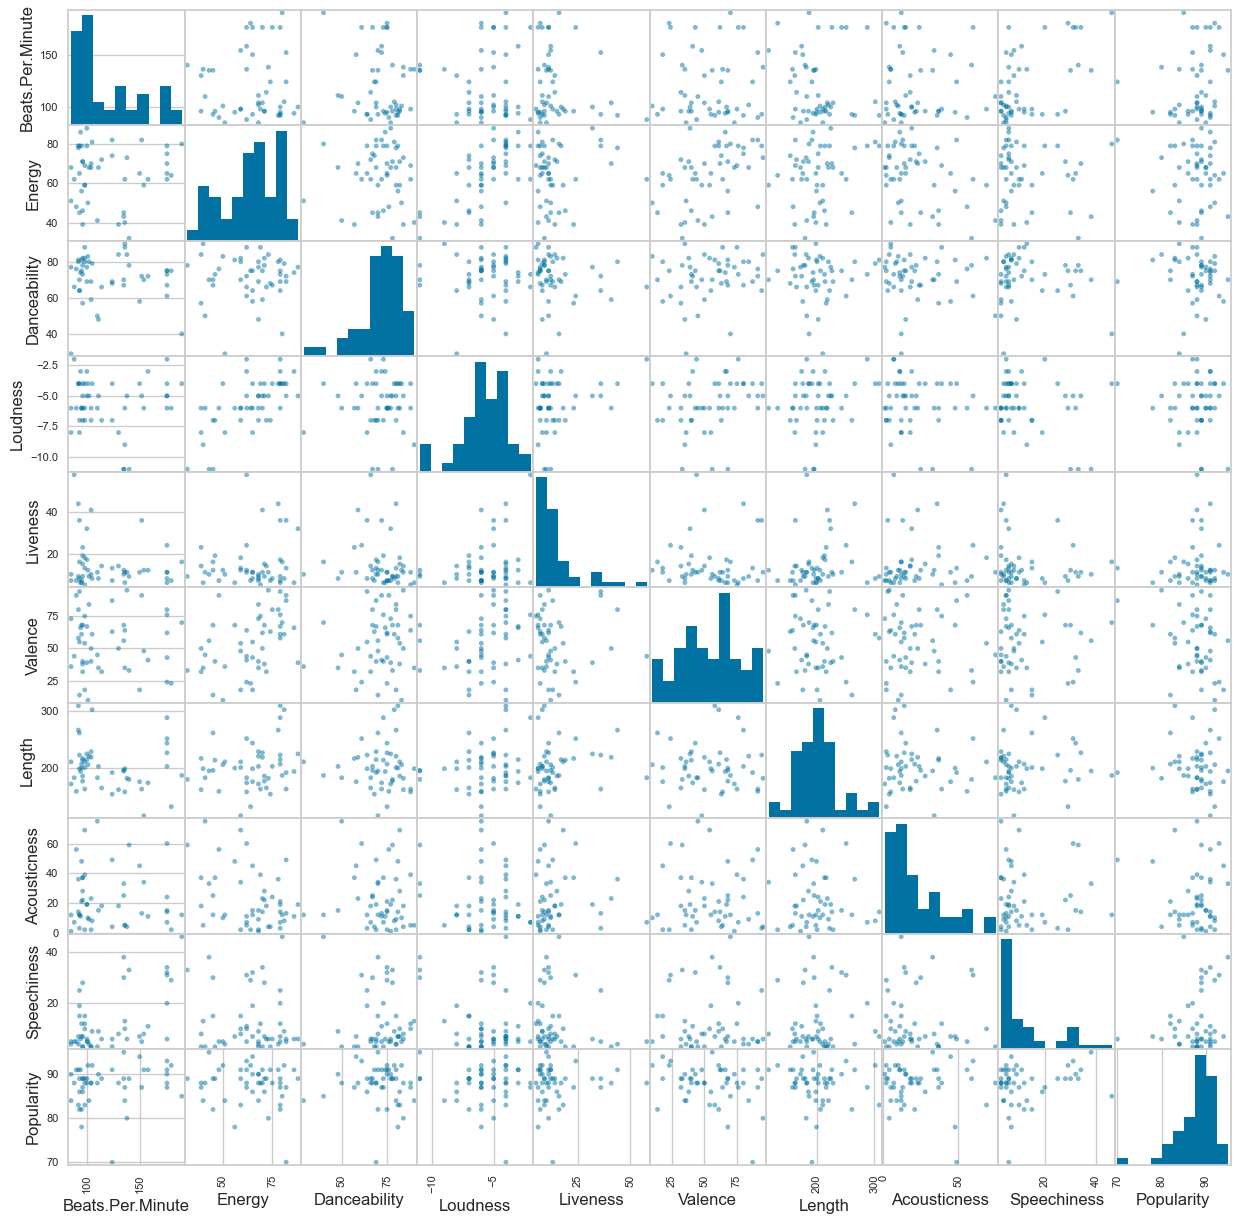

In [67]:
# histogram
final.hist()
plt.gcf().set_size_inches(15, 15)    #Thanks to this graphic, we can see the feature is right or left skewed.
plt.show()

from pandas.plotting import scatter_matrix

# scatter plot matrix
scatter_matrix(final)
plt.gcf().set_size_inches(15, 15)
plt.show()

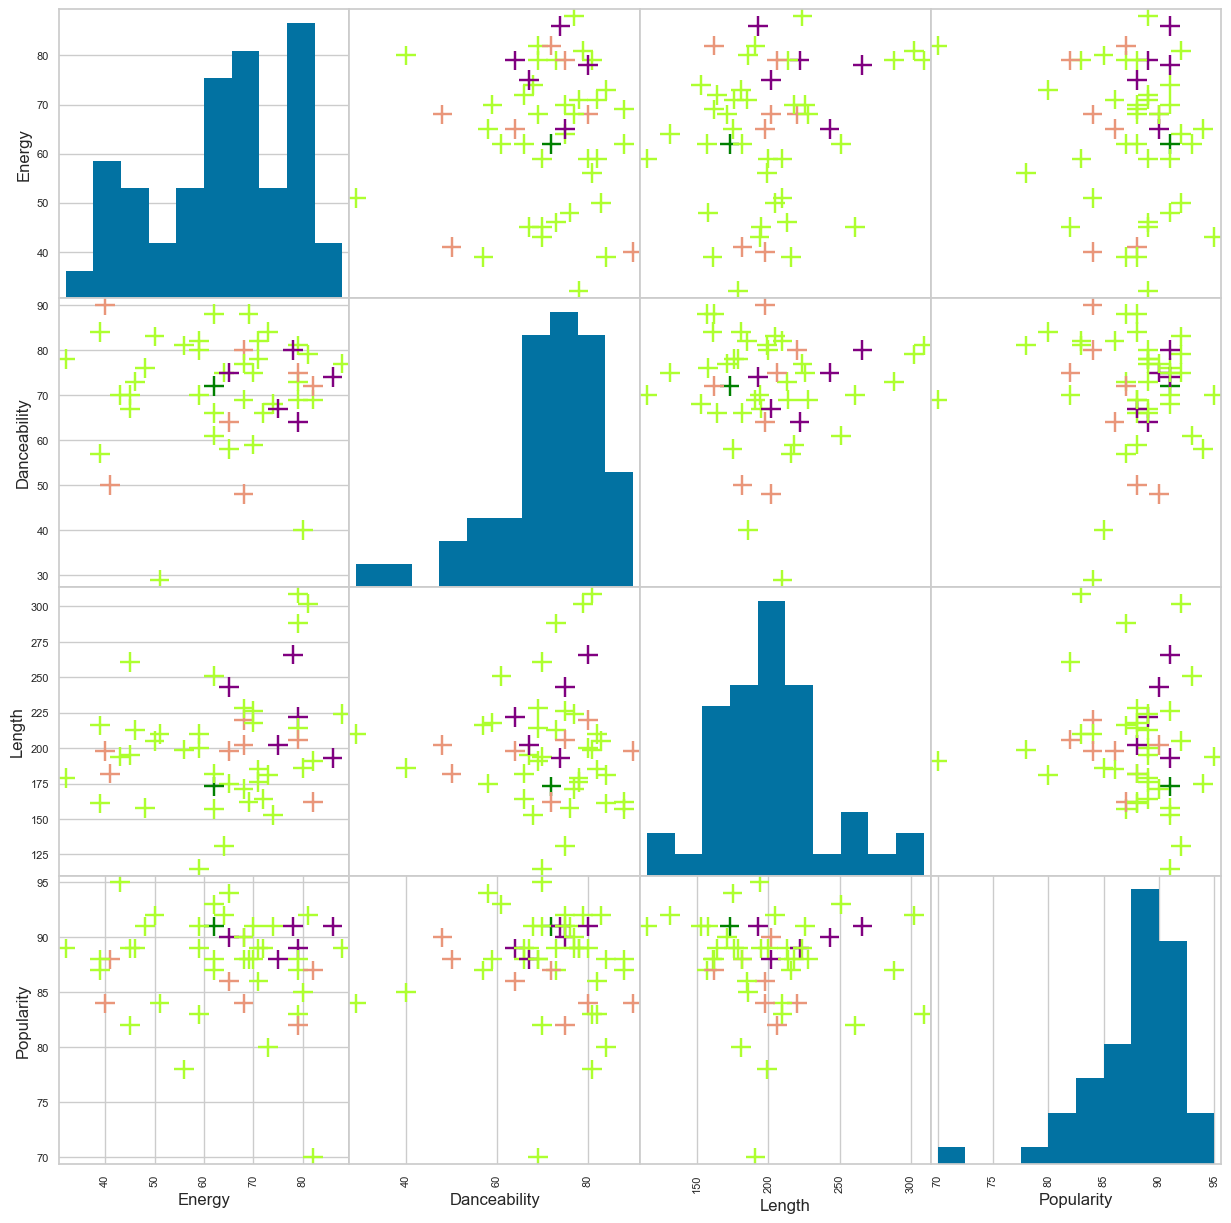

In [68]:
color_list = ['red' if i=='electronic' 
              else 'green' if i=='escape room' 
              else 'blue' if i == 'hip hop' 
              else 'purple' if i == 'latin'
              else 'darksalmon' if i == 'pop'
              else 'darkcyan' if i == 'raggae'
              else 'greenyellow' for i in final.loc[:,'Genre']]
pd.plotting.scatter_matrix(final.loc[:,['Energy','Danceability','Length','Popularity']],
                                       c=color_list,
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=1,
                                       s = 200,
                                       marker = '+',
                                       edgecolor= "black")
plt.show()

In [69]:
import plotly.express as px

fig = px.scatter(final, x="Beats.Per.Minute", y="Valence",size='Acousticness'
                 ,color="GeneralGenre")
fig.show()

For example, this graph shows that the pop genre, which has a high Beats.Per.Minute and Valence values, has low Acousticness value.

In [70]:
#Box Plot Each Features

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go

init_notebook_mode(connected=True)

trace0 = go.Box(
    y=final['Beats.Per.Minute'],
    name = 'Beats.Per.Minute'
)
trace1 = go.Box(
    y=final['Energy'],
    name = 'Energy'
)
trace2 = go.Box(
    y=final['Danceability'],
    name = 'Danceability'
)
trace3 = go.Box(
    y=final['Loudness'],
    name = 'Loudness'
)
trace4 = go.Box(
    y=final['Liveness'],
    name = 'Liveness'
)
trace5 = go.Box(
    y=final['Valence'],
    name = 'Valence'
)
trace6 = go.Box(
    y=final['Loudness'],
    name = 'Loudness'
)
trace7 = go.Box(
    y=final['Length'],
    name = 'Length'
)
trace8 = go.Box(
    y=final['Acousticness'],
    name = 'Acousticness'
)
trace9 = go.Box(
    y=final['Speechiness'],
    name = 'Speechiness'
)
trace10 = go.Box(
    y=final['Popularity'],
    name = 'Popularity'
)
data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8,trace9,trace10]

fig = go.Figure(data=data)

py.offline.iplot(fig)

In [71]:
pd=pd.DataFrame(final['Genre'].value_counts())
pd.head(2)

,Genre
dance pop,8
pop,7


In [72]:
pd.rename(columns={"Genre": "Count"},inplace=True)
pd['Genre'] = pd.index
pd['Ratio'] = pd['Count']/pd['Count'].sum() #Add count ratio for each genre

In [73]:
pd.head()

,Count,Genre,Ratio
dance pop,8,dance pop,0.163265
pop,7,pop,0.142857
latin,5,latin,0.102041
edm,3,edm,0.061224
canadian hip hop,3,canadian hip hop,0.061224


In [74]:
pd['Ratio'] = pd['Ratio'].astype(float)

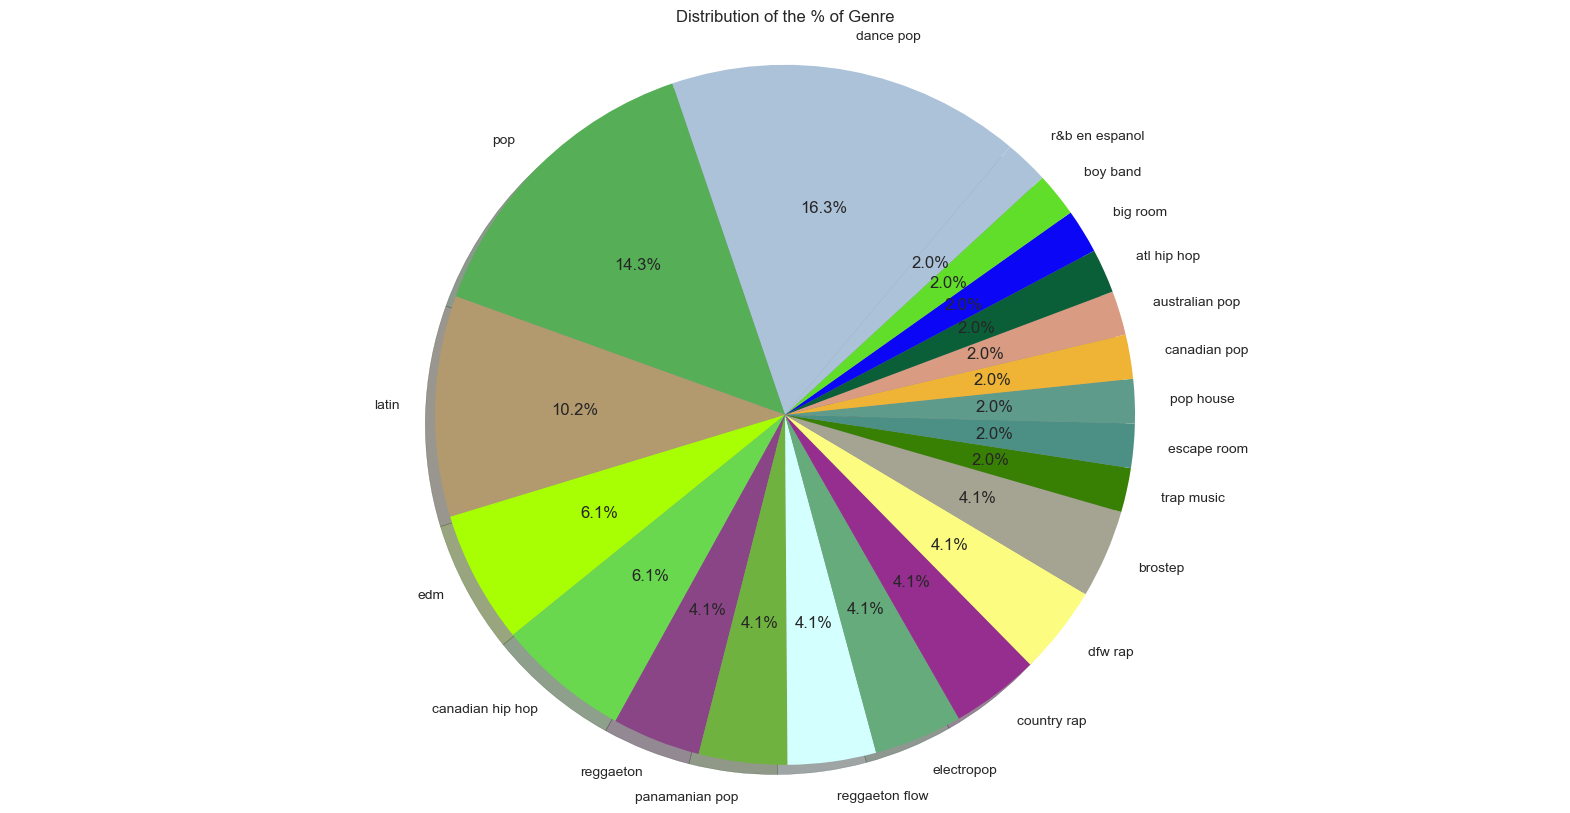

In [75]:
import matplotlib.colors as colors
labels_list = pd['Genre']
colors_list = list(colors._colors_full_map.values())

# Plot
plt.figure(figsize=(20,10))
plt.pie(pd['Ratio'], colors=colors_list[0:20],
autopct='%1.1f%%', shadow=True, startangle=50,
       labels=labels_list)

plt.axis('equal')
plt.title('Distribution of the % of Genre')
plt.show()


K-Means Clustering

In [76]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 1 to 49
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track.Name        49 non-null     object 
 1   Artist.Name       49 non-null     object 
 2   Genre             49 non-null     object 
 3   Beats.Per.Minute  49 non-null     float64
 4   Energy            49 non-null     float64
 5   Danceability      49 non-null     float64
 6   Loudness          49 non-null     float64
 7   Liveness          49 non-null     float64
 8   Valence           49 non-null     float64
 9   Length            49 non-null     float64
 10  Acousticness      49 non-null     float64
 11  Speechiness       49 non-null     float64
 12  Popularity        49 non-null     float64
 13  GeneralGenre      49 non-null     object 
dtypes: float64(10), object(4)
memory usage: 5.7+ KB


In [77]:
final2=final.drop(columns=['Track.Name', 'Artist.Name', 'GeneralGenre', 'Genre'])

In [78]:
final2.head()

,Beats.Per.Minute,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
Unnamed: 0,,,,,,,,,,
1,105.0,81.0,79.0,-4.0,8.0,61.0,302.0,8.0,9.0,92.0
2,190.0,80.0,40.0,-4.0,16.0,70.0,186.0,12.0,46.0,85.0
3,93.0,65.0,64.0,-8.0,8.0,55.0,198.0,12.0,19.0,86.0
4,150.0,65.0,58.0,-4.0,11.0,18.0,175.0,45.0,7.0,94.0
5,102.0,68.0,80.0,-5.0,9.0,84.0,220.0,9.0,4.0,84.0


In [79]:
#Rename Column
final2=final2.rename(columns={"Beats.Per.Minute": "BeatsPerMinute"})

In [80]:
#Standardizing to all data

from sklearn.preprocessing import StandardScaler
final2[['BeatsPerMinute', 'Energy',
        'Danceability','Loudness',
        'Liveness','Valence',
        'Length','Acousticness',
        'Speechiness','Popularity']] = StandardScaler().fit_transform(final2[['BeatsPerMinute','Energy',
                                                                              'Danceability','Loudness',
                                                                              'Liveness','Valence',
                                                                              'Length','Acousticness',
                                                                              'Speechiness','Popularity']])

In [81]:
final2.tail()

,BeatsPerMinute,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
Unnamed: 0,,,,,,,,,,
45,-1.039722,-0.158407,-0.443759,1.776899,3.900451,-0.459943,-0.489890,-0.825485,-0.692711,0.075573
46,1.808614,0.758912,-0.359804,0.804072,-0.613533,1.165987,0.021390,0.078101,-0.602438,0.075573
47,-0.651312,1.041164,-0.191896,1.290485,0.198984,0.578846,0.328159,-0.187660,-0.692711,0.075573
48,-0.521843,0.406097,-1.031439,-0.168756,2.365696,-0.188954,0.430415,0.024949,-0.873258,0.075573
49,-0.813150,1.041164,0.311830,-0.168756,-0.703813,0.307858,0.123646,-0.081355,-0.060796,-1.313075


In [82]:
# KMeans Clustering
!pip install yellowbrick
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [83]:
kmeans=KMeans()

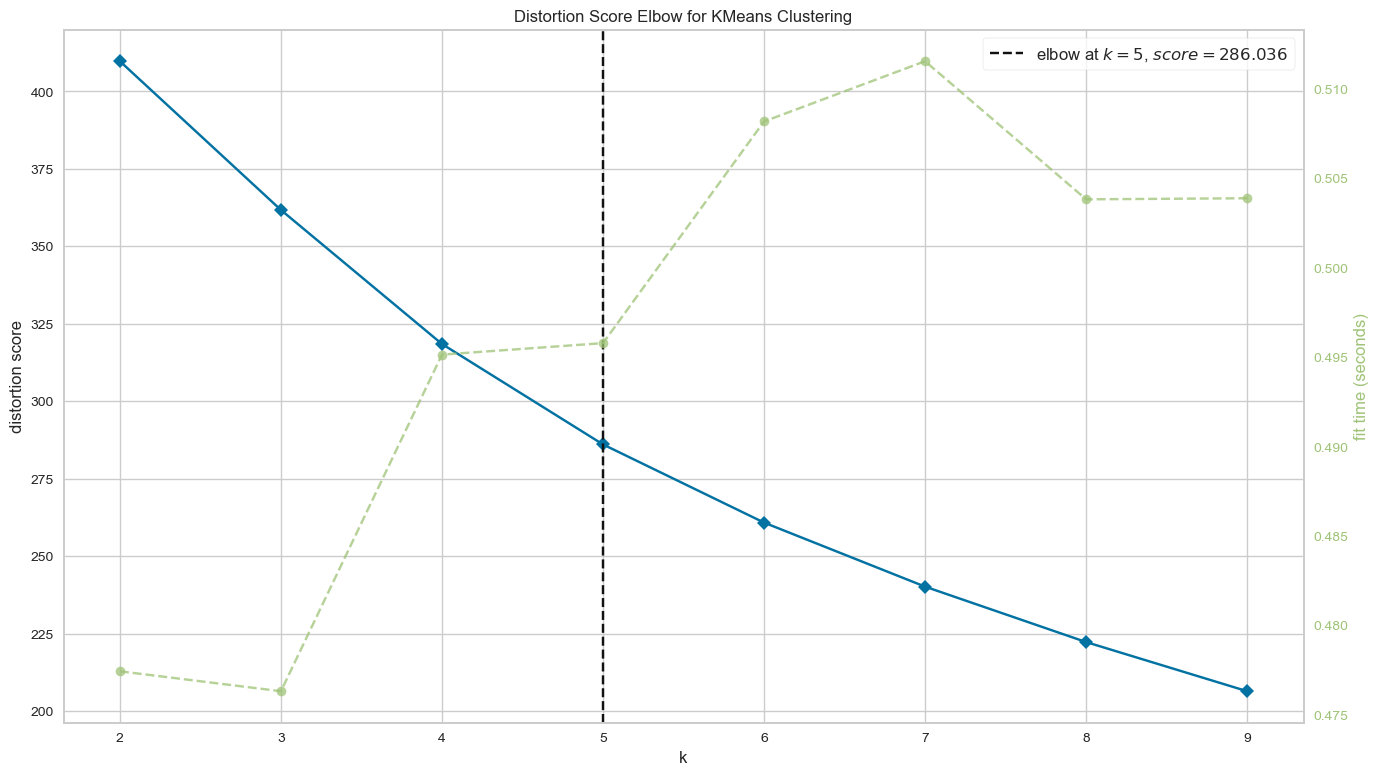

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [84]:
visualizer=KElbowVisualizer(kmeans, k=(2,10))
visualizer.fit(final2)
visualizer.poof()

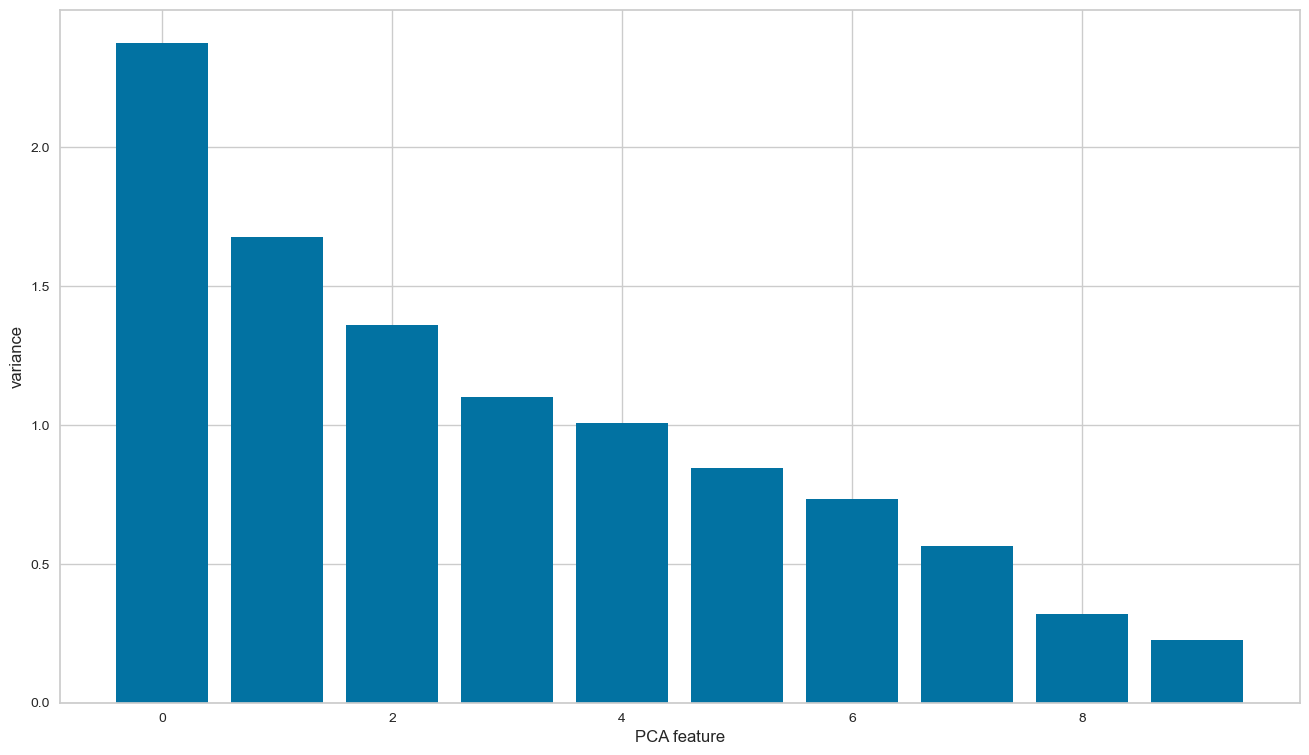

In [85]:
# PCA variance
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline


scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler,pca)
pipeline.fit(final2)

plt.bar(range(pca.n_components_), pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.show()

In [86]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=7)
kmeans

KMeans(n_clusters=7)

In [87]:
k_fit=kmeans.fit(final2)

In [88]:
clusters=k_fit.labels_
clusters

array([5, 2, 3, 2, 6, 2, 3, 6, 0, 2, 6, 0, 2, 3, 3, 2, 6, 0, 2, 6, 0, 5,
       1, 0, 4, 4, 3, 6, 1, 3, 0, 6, 3, 1, 3, 2, 1, 6, 4, 3, 6, 3, 0, 6,
       1, 2, 6, 1, 6])

In [89]:
final2['segment']=clusters+1
final2.head()

,BeatsPerMinute,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity,segment
Unnamed: 0,,,,,,,,,,,
1,-0.489475,1.182290,0.647648,0.804072,-0.613533,0.307858,2.577792,-0.772333,-0.331617,1.001338,6
2,2.261758,1.111727,-2.626572,0.804072,0.108704,0.714340,-0.387634,-0.559725,3.008504,-0.618751,3
3,-0.877885,0.053282,-0.611667,-1.141583,-0.613533,0.036869,-0.080866,-0.559725,0.571118,-0.387310,4
4,0.967060,0.053282,-1.115393,0.804072,-0.342694,-1.634226,-0.668838,1.194296,-0.512164,1.464220,3
5,-0.586577,0.264971,0.731602,0.317658,-0.523254,1.346646,0.481543,-0.719181,-0.782985,-0.850192,7


In [90]:
import mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D

centers=kmeans.cluster_centers_

plt.rcParams['figure.figsize'] = (16,9)
fig=plt.figure()

ax=Axes3D(fig)
ax.scatter(final2.iloc[:,0], final2.iloc[:,1], final2.iloc[:,2]);

<Figure size 1600x900 with 0 Axes>

In [91]:
joined_df_merge = final2.merge(final, how='left', 
                                      left_index=True,
                                      right_index=True)

In [92]:
joined_df_merge[['segment','Genre','GeneralGenre']]

,segment,Genre,GeneralGenre
Unnamed: 0,,,
1,6,reggaeton flow,raggae
2,3,dance pop,pop
3,4,pop,pop
4,3,dfw rap,rap
5,7,pop,pop
6,3,trap music,hip hop
7,4,pop,pop
8,7,country rap,rap
9,1,electropop,electronic


Unsupervised - Hierarchy

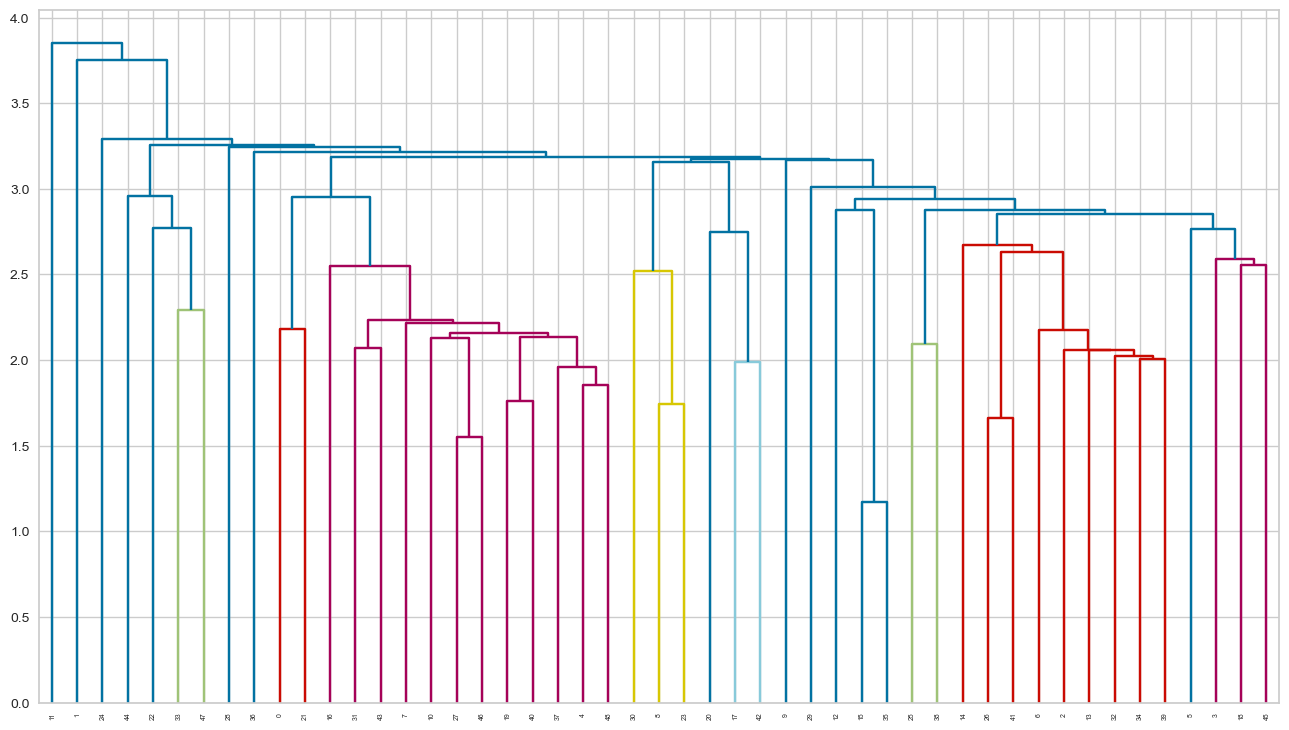

In [93]:
from scipy.cluster.hierarchy import linkage,dendrogram

merg = linkage(final2,method = 'single')
dendrogram(merg, leaf_rotation = 90, leaf_font_size =5)
plt.show()